# Regressores & Aprendizagem de Máquina

### ML como um problema de otimização

* _Estimador linear_, considerando $n-1$ atributos: 
    
    $\hat{y}(\textbf{w}) = \hat{y}(\textbf{w}, \textbf{x}) = w_0 x_0 + w_1 x_1 + \ldots + w_{n-1} x_{n-1} + b$
    
    $\hat{y}(\textbf{w}) = w_0 x_0 + w_1 x_1 + \ldots + w_{n-1} x_{n-1} + w_{n} x_{n}$ (bias incorporado em $\textbf{x}$, $b = w_n, x_n = 1$)
    
    $\hat{y}(\textbf{w}) = \textbf{x} \dot~\textbf{w}$

    Se considerarmos todas as $m$ instâncias $\textbf{x}$, temos $\hat{y}(\textbf{w}) = X \dot~\textbf{w}$ (supondo $X^{(m \times n)}$ e $\textbf{w}^{(n \times 1)}$)

* Eventualmente estimador linear poderia incorporar um transformador, uma _função de ativação_ $\alpha$: 
    
    $\hat{y}(\textbf{w}) = \alpha(X \dot~\textbf{w})$
    
    Supondo $\alpha(x) = x$, função identidade, temos o estimador clássico usado na regressão linear, ou seja,     $\hat{y}(\textbf{w}) = X \dot~\textbf{w}$. Funções de ativação podem ser usadas para transformar a saída para um certo intervalo (-1 a 1, 0 a 1, etc) e também modificarem a natureza simples de um estimador polinomial de grau 1, como o usado aqui. 

* _Função de perda_ (_loss_), avalia o quão bom é o seu estimador $\hat{y}(\textbf{w})$ em relação aos valores reais $\textbf{y}$. Por exemplo, ao adotarmos a média das diferenças dos quadrados (MSE -- mean squared error), temos:

    $\ell(\hat{y}(\textbf{w}), \textbf{y}) = \frac{1}{m} \sum_{i}^{m}{(\hat{y}_i(\textbf{w}) - y_i)^2}$
    
    $\ell(\hat{y}(\textbf{w}), \textbf{y}) = mean ((\hat{y}(\textbf{w}) - \textbf{y})^2)$

* Função de perda com _regularizador_ $R$:

    $L(\hat{y}(\textbf{w}), \textbf{y}) = \ell(\hat{y}(\textbf{w}), \textbf{y}) + \lambda R(\textbf{w})$
    
    O regularizador é uma função de penalização que tem por objetivo eliminar certos conjuntos de pesos, privilegiando outros. Ao fazer isso, o modelo se restringe a um menor espaço de pesos, melhorando sua generalização. Exemplos de regularizadores são o L1 ($R(\mathbf{w}) \approx \sum_{\forall i}{|w_i|}$) e o L2 ($R(\mathbf{w}) \approx \sum_{\forall i}{|w_i|}^2$). Note que enquanto L1 prefere pesos não nulos, o L2 não gosta de _outliers_.

* Objetivo de ML é determinar $\textbf{w}$ que minimiza $L$, ou seja, determinar $\textbf{w}$ tal que $\frac{\partial}{\partial \textbf{w}} L(\hat{y}(\textbf{w}), \textbf{y}) = 0$. No nosso caso, supondo $\lambda = 0$:

    $
    \begin{align}
        \frac{\partial}{\partial \textbf{w}} L(\hat{y}(\textbf{w}), \textbf{y}) &= \frac{\partial}{\partial \textbf{w}} \frac{1}{m} \sum_{i}^{m}{(\hat{y}_i(\textbf{w}) - y_i)^2} = 0 \\
        &= \frac{1}{m} \sum_{i}^{m}{\frac{\partial}{\partial \textbf{w}} (\hat{y}_i(\textbf{w}) - y_i)^2} \\
        &= \frac{1}{m} \sum_{i}^{m}{\frac{\partial}{\partial \textbf{w}} (\textbf{x}_i \dot~\textbf{w} - y_i)^2} \\
        &= \frac{1}{m} \sum_{i}^{m}{\frac{\partial}{\partial \textbf{w}} ({\textbf{x}_i}^2 \dot~\textbf{w}^2 - 2 \textbf{x}_i \dot~\textbf{w} \dot~y_i + {y_i}^2})  \\
        &= \frac{1}{m} \sum_{i}^{m}{(2 {\textbf{x}_i}^2 \dot~\textbf{w} - 2 \textbf{x}_i \dot~y_i)}  \\
        &= \frac{2}{m} \sum_{i}^{m}{({\textbf{x}_i}^2 \dot~\textbf{w} - \textbf{x}_i \dot~y_i)}  \\
        &= \frac{2}{m} (\sum_{i}^{m}{{\textbf{x}_i}^2 \dot~\textbf{w}} - \sum_{i}^{m} {\textbf{x}_i \dot~y_i})  \\
        &= \frac{2}{m} (X^T X\dot~\textbf{w} - X^T \textbf{y}) \text{ supondo } X^{(m \times n)}, \textbf{y}^{(m \times 1)} \text{ e } \textbf{w}^{(n \times 1)}\\ 
        &= \frac{2}{m} X^T (X\dot~\textbf{w} - \textbf{y})  
    \end{align}    
    $

    Esta função corresponde ao gradiente da função de perda $L$ e pode ser usado para obter $\textbf{w}$ tanto diretamente quanto iterativamente. Como a solução direta é limitada a valores pequenos de $n$ e $m$, vamos implementar a solução iterativa, o _Gradiente Descendente_.

### Gradiente Descendente

* GradientDescendente($X^{m \times n}$, $\textbf{y}^{m \times 1}$, taxa de aprendizado $\eta$, número de épocas $N$):
    - inicie $\textbf{w}^{n \times 1}$ com valores aleatorios entre -1 e 1
    - para $N$ épocas:
        - $\hat{y}(\textbf{w}) = X \dot~\textbf{w}$
        - $\ell(\hat{y}(\textbf{w}), \textbf{y}) = mean ((\hat{y}(\textbf{w}) - \textbf{y})^2)$
        - $\nabla\ell = \frac{2}{m} X^T (X\dot~\textbf{w} - ~\textbf{y})$
        - $\textbf{w}' = \textbf{w} - \eta \nabla\ell$
        - $\textbf{w} = \textbf{w}'$
    - retorne $\textbf{w}$


### GD em Numpy

In [4]:
from __future__ import division, print_function
from IPython.display import HTML

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
x = np.linspace(-1, 1, 10)
y = 6. * x - 1.
y += np.random.normal(0, 1.0, len(x))
print(x)
print(y)

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
[-8.65031837 -4.81077567 -3.4490515  -4.8064985  -2.17478898  0.05272406
  0.44393123  1.74723462  1.96466113  4.43672087]


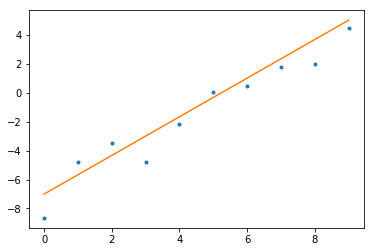

In [7]:
plt.plot(y, '.')
plt.plot(6. * x - 1)

In [8]:
xscaled = (x - np.mean(x))/np.std(x)

In [9]:
xscaled

array([-1.5666989 , -1.21854359, -0.87038828, -0.52223297, -0.17407766,
        0.17407766,  0.52223297,  0.87038828,  1.21854359,  1.5666989 ])

Incorporando bias em X

In [10]:
X = np.stack([np.ones(len(y)), xscaled]).T

In [11]:
X

array([[ 1.        , -1.5666989 ],
       [ 1.        , -1.21854359],
       [ 1.        , -0.87038828],
       [ 1.        , -0.52223297],
       [ 1.        , -0.17407766],
       [ 1.        ,  0.17407766],
       [ 1.        ,  0.52223297],
       [ 1.        ,  0.87038828],
       [ 1.        ,  1.21854359],
       [ 1.        ,  1.5666989 ]])

In [12]:
y.reshape(-1,1)

array([[-8.65031837],
       [-4.81077567],
       [-3.4490515 ],
       [-4.8064985 ],
       [-2.17478898],
       [ 0.05272406],
       [ 0.44393123],
       [ 1.74723462],
       [ 1.96466113],
       [ 4.43672087]])

In [13]:
m, n = X.shape
m, n

(10, 2)

In [14]:
W = np.random.uniform(-1, 1, (2,1))
W

array([[-0.02585676],
       [-0.59782556]])

In [12]:
np.matmul(X, W)

array([[ 1.68340522],
       [ 1.4744723 ],
       [ 1.26553938],
       [ 1.05660646],
       [ 0.84767354],
       [ 0.63874063],
       [ 0.42980771],
       [ 0.22087479],
       [ 0.01194187],
       [-0.19699105]])

In [13]:
def gd(X, y, n_epochs = 100, lrating = 0.1):    
    m, n = X.shape # m instancias e n colunas (incluindo bias)
    Y = y.reshape(-1,1)
    W = np.random.uniform(-1, 1, (n, 1))
    for e in range(n_epochs):
        Yhat = np.matmul(X, W)
        error = Yhat - Y
        loss = np.mean(error ** 2)
        gloss = (2./m) * np.matmul(X.T, error)
        Wn = W - lrating * gloss
        W = Wn
        if e%10 == 0:
            print(loss)
    return W

In [14]:
W = gd(X, y, n_epochs = 200, lrating = 0.1)
W

17.34341603039561
0.42091357749818065
0.22581040760110543
0.22356102119919236
0.223535087539643
0.22353478854490522
0.2235347850977305
0.22353478505798727
0.2235347850575291
0.22353478505752383
0.22353478505752378
0.22353478505752372
0.22353478505752383
0.22353478505752378
0.22353478505752372
0.22353478505752372
0.22353478505752372
0.22353478505752378
0.22353478505752378
0.22353478505752378


array([[-0.88848956],
       [ 3.80333204]])

(-1, 10)

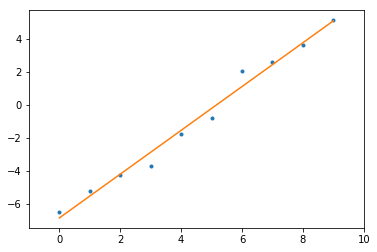

In [17]:
plt.plot(y, '.')
plt.plot(np.matmul(X,W))
plt.xlim(-1,10)

### Traduzindo para TF

In [1]:
import tensorflow as tf

E:\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [15]:
def gdtf(X, y, n_epochs = 100, lrating = 0.1):
    m, n = X.shape
    
    X = tf.constant(X, dtype = tf.float32, name = "X")
    y = tf.constant(y.reshape(-1, 1), dtype = tf.float32, name = "y")
    W = tf.Variable(tf.random_uniform([n, 1], -1.0, 1.0), name = "W")
    
    Yhat = tf.matmul(X, W, name = "predictions")
    error = Yhat - y
    loss = tf.reduce_mean(tf.square(error), name = "loss")
    gloss = (2./m) * tf.matmul(tf.transpose(X), error)
    training = tf.assign(W, W - lrating * gloss)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as s:
        s.run(init)
        for e in range(n_epochs):
            s.run(training)
            if e%10==0:
                print(loss.eval())
        finalW = W.eval()
        tf.summary.FileWriter('logs/tfhelloworld', s.graph)
    return finalW

In [16]:
W = gdtf(X, y, n_epochs=100)
W

8.816907
0.95846015
0.8678585
0.86681384
0.86680174
0.86680174
0.86680174
0.86680144
0.86680144
0.86680144


array([[-1.524616 ],
       [ 3.6412103]], dtype=float32)

(-10, 10)

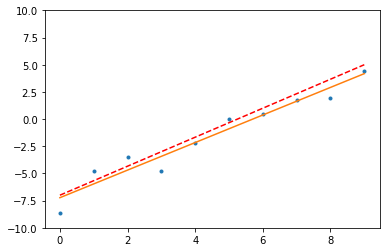

In [17]:
plt.plot(y, '.')
plt.plot(np.matmul(X,W))
plt.plot(6*x - 1.0, 'r--')
plt.ylim(-10,10)

Além de saber se função está sendo minimizada, é importante ver como ela está sendo minimizada. Assim, o código normalmente coleta mais informações, mas com o cuidado de não interferir constantemente com a otimização.

In [ ]:
def gdtf(X, y, n_epochs = 100, lrating = 0.1):
    m, n = X.shape
    
    X = tf.constant(X, dtype = tf.float32, name = "X")
    y = tf.constant(y.reshape(-1, 1), dtype = tf.float32, name = "y")
    W = tf.Variable(tf.random_uniform([n, 1], -1.0, 1.0), name = "W")
    
    Yhat = tf.matmul(X, W, name = "predictions")
    error = Yhat - y
    loss = tf.reduce_mean(tf.square(error), name = "loss")
    gloss = (2./m) * tf.matmul(tf.transpose(X), error)
    training = tf.assign(W, W - lrating * gloss)
    
    init = tf.global_variables_initializer()
    
    lossvalues = []
    with tf.Session() as s:
        s.run(init)
        for e in range(n_epochs):
            s.run(training)
            lossvalues += [loss.eval()]  # guardando os valores de perda
            if e%10==0:                  # evitando I/O a cada rodada
                print(lossvalues[-1])
        finalW = W.eval()
    return finalW, lossvalues

In [ ]:
W, lossvalues = gdtf(X, y, n_epochs=100)
W

In [ ]:
plt.plot(lossvalues[:40])

Note que deveriamos evitar avaliar o grafo múltiplas vezes para obter valores de nós. O ideal é obter todos os valores de interesse em uma única avaliação, como feito abaixo:

In [ ]:
def gdtf(X, y, n_epochs = 100, lrating = 0.1):
    m, n = X.shape
    
    X = tf.constant(X, dtype = tf.float32, name = "X")
    y = tf.constant(y.reshape(-1, 1), dtype = tf.float32, name = "y")
    W = tf.Variable(tf.random_uniform([n, 1], -1.0, 1.0), name = "W")
    
    Yhat = tf.matmul(X, W, name = "predictions")
    error = Yhat - y
    loss = tf.reduce_mean(tf.square(error), name = "loss")
    gloss = (2./m) * tf.matmul(tf.transpose(X), error)
    training = tf.assign(W, W - lrating * gloss)
    
    init = tf.global_variables_initializer()
    
    lossvalues = []
    with tf.Session() as s:
        s.run(init)
        for e in range(n_epochs):
            W_e, loss_e = s.run([training, loss]) # Roda o grafo uma unica vez para treino e perda
            lossvalues += [loss_e]
            if e%10==0:
                print(lossvalues[-1])
    return W_e, lossvalues

In [ ]:
W, lossvalues = gdtf(X, y, n_epochs=100)
W

### Diferenciação automática

Note que a função a ser diferenciada depende do estimador, da ativação, da função de perda e do regularizador. Logo, ela pode ser bastante complexa.

Para estas situações, o TF ajuda com um mecanismo de auto diferenciação.

In [ ]:
# autodiferenciador
def gdtf2(X, y, n_epochs = 100, lrating = 0.1):
    m, n = X.shape
        
    X = tf.constant(X, dtype = tf.float32, name = "X")
    y = tf.constant(y.reshape(-1, 1), dtype = tf.float32, name = "y")
    W = tf.Variable(tf.random_uniform([n, 1], -1.0, 1.0), name = "W")
    
    Yhat = tf.matmul(X, W, name = "predictions")
    error = Yhat - y
    loss = tf.reduce_mean(tf.square(error), name = "loss")
    # gradients(funcao de perda, variaveis) --> [gradiente parcial em cada variavel]
    gloss = tf.gradients(loss, [W])[0]
    training = tf.assign(W, W - lrating * gloss)
    
    init = tf.global_variables_initializer()
    lossvalues = []
    with tf.Session() as s:
        s.run(init)
        for e in range(n_epochs):
            W_e, loss_e = s.run([training, loss])
            lossvalues += [loss_e]
            if e%10==0:
                print(loss_e)
    return W_e, lossvalues

In [ ]:
W, _ = gdtf2(X, y, n_epochs=100)
W

### Diferentes otimizadores

Como lidar com mínimos locais e _saddle points_?? (pontos em que eixos representam concavidades opostas, muitas vezes não fáceis de detectar devido a platôs)


In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/NY-UOaLbhrE" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

Uma possibilidade para lidar com estes problemas é usar diferentes otimizadores, como os descritos a seguir:

* _SGD_: gradiente descendente estocástico. Usa gradiente da função para determinar direção e distância do ponto de mínimo. Ele corresponde ao GD clássico (_batch GD_) considerando estimativas baseadas em uma única instância $x_i$; se mais instâncias forem usadas, digamos $b$ instâncias, tal que $b << m$, então o algoritmo é chamado de GD (ou SGD, dependendo dos autores) com mini lotes, cada lote com tamanho $b$ (mini-batch [stochastic] gradient descent);

* _Momento_: atualização dos pesos depende de útima atualização, de forma que o impulso anterior interfere no comportamento atual (mais adiante). Supondo uma bolinha descendo um morro, ela vai ficando cada vez mais rápida à medida que desce. Algumas variantes deste algorimo podem incorporar ruído Gaussiano;

* _Gradiente Acelerado de Nesterov_ (NAG): o momento é corrigido pelo efeito que ele vai ter. Intuitivamente, é como se o comportamento fosse baseado no impulso (passado) corrigido pelo comportamento que se vai adquirir em seguida (futuro). Supondo a bolinha descendo o morro, ela vai desacelerando à medida que se aproxima de um novo morro (isso diminui o efeito de vai-e-vem perto do mínimo);

* _Adagrad_: Os métodos anteriores supõem que uma mesma taxa de atualização $\eta$ deve ser aplicada para todos os parâmetros $w_0, w_1, ..., w_n$. Adagrad é um método adaptativo que aplica um valor distinto de $\eta$ ($\eta_0, \eta_1, ..., \eta_n$) para cada parâmetro de acordo com os valores anteriores observados para esse parâmetro. A ideia é atualizar _mais_ parâmetros associados a atributos observados menos frequentemente; e _menos_, parâmetros associados a atributos mais frequentes. Estes métodos são particularmente rápidos para problemas em que há atributos esparsos como em linguagem natural. Uma vantagem desse método é não ser necessário adotar uma política manual de atualização de um $\eta$ global. Uma desvantagem é que a taxa de aprendizado tende à zero com o tempo;

* _Adadelta_: extensão de Adagrad que tenta resolver o problema de sumiço de $\eta$ baseando a adaptação em uma janela de valores do passado de tamanho fixo em lugar de todos os valores;

* _RMSProp_: método proposto por Hinton, quase ao mesmo tempo que o Adadelta, para corrigir o problema do Adagrad. Embora haja pequenas diferenças em relação ao Adadelta, eles se baseiam em ideias muito similares;

* _Adam_, _AdaMax_ e _Nadam_: modificações de Adadelta (Adam e AdaMax) e RMSProb (Nadam) para incorporar momento aos métodos adaptativos;

Em geral, estes algoritmos buscam lidar melhor com diferentes topologias que o SGD. Por exemplo, veja o caso de superfícies com simetrias (as animações abaixo são de Alec Radford): algoritmos baseados em momento exploram até encontrar saída; os adaptativos rapidamente começam a descer.

![](images/LongValleyImgur.gif)

No caso de superfícies com _saddle points_, o SGD se mostra claramente muito lento; os de momento repetem seu comportamento exploratório; os adaptativos novamente são muito rápidos.

![](images/SaddlePointImgur.gif)

Abaixo, um exemplo de uso de um otimizador de momento no TF:

In [ ]:
# otimizadores
def gdtf3(X, y, n_epochs = 100, lrating = 0.1):
    m, n = X.shape
    
    X = tf.constant(X, dtype = tf.float32, name = "X")
    y = tf.constant(y.reshape(-1, 1), dtype = tf.float32, name = "y")
    W = tf.Variable(tf.random_uniform([n, 1], -1.0, 1.0), name = "W")
    
    Yhat = tf.matmul(X, W, name = "predictions")
    loss = tf.reduce_mean(tf.square(Yhat - y), name = "loss")
    
    #otimizador = tf.train.GradientDescentOptimizer(learning_rate = lrating)
    otimizador = tf.train.MomentumOptimizer(learning_rate = lrating, momentum = 0.9)
    training = otimizador.minimize(loss)
    
    init = tf.global_variables_initializer()
    lossvalues = []
    with tf.Session() as s:
        s.run(init)
        for e in range(n_epochs):
            W_e, loss_e = s.run([training, loss])
            lossvalues += [loss_e]
            if e%10==0:
                print(loss_e)
    return W_e, lossvalues

In [ ]:
W, _ = gdtf3(X, y, n_epochs=100)
W

O otimizador baseado em momento, usado no programa acima, "lembra" a última atualização e a repete em parte -- algo como descrito na Equação abaixo:

$$\textbf{w}' = \textbf{w} + \mu * v - \eta \nabla\ell$$

onde $\mu$ é o quanto a última atualização $v$ deve ser lembrada. Um típico valor de de $\mu$ pode ser 0.9. 

**Exercício**: Compare os otimizadores, usando 40 épocas: 
* GradientDescentOptimizer(learning_rate = 0.1)
* AdagradOptimizer(learning_rate = 1.0)
* RMSPropOptimizer(learning_rate = 0.1)
* AdamOptimizer(learning_rate = 1.0)

Uma vez que tiver obtido as curvas de perda para cada método (ls_sgd, ls_adag, ls_rms e ls_adam) você pode plotá-las com o código abaixo:

```python
# gráficos
plt.plot(ls_sgd, label = 'sgd')
plt.plot(ls_adag, label = 'adag')
plt.plot(ls_rms, label = 'rms')
plt.plot(ls_adam, label = 'adam')
plt.legend()
```

<div align="right">
<a href="#losses" class="btn btn-default" data-toggle="collapse">Solução #1</a>
</div>
<div id="losses" class="collapse">
```
# otimizadores
def gdtf_opt(X, y, n_epochs = 100, lrating = 0.1, 
             otimizador = None):
    m, n = X.shape
    
    X = tf.constant(X, dtype = tf.float32, name = "X")
    y = tf.constant(y.reshape(-1, 1), dtype = tf.float32, name = "y")
    W = tf.Variable(tf.random_uniform([n, 1], -1.0, 1.0), name = "W")
    
    Yhat = tf.matmul(X, W, name = "predictions")
    loss = tf.reduce_mean(tf.square(Yhat - y), name = "loss")
    
    training = otimizador.minimize(loss)
    
    init = tf.global_variables_initializer()
    lossvalues = []
    with tf.Session() as s:
        s.run(init)
        for e in range(n_epochs):
            W_e, loss_e = s.run([training, loss])
            lossvalues += [loss_e]
    return W_e, lossvalues

# execução
W, ls_sgd = gdtf_opt(X, y, n_epochs=40, 
             otimizador = tf.train.GradientDescentOptimizer(
                 learning_rate = 0.1))
W, ls_adag = gdtf_opt(X, y, n_epochs=40, 
             otimizador = tf.train.AdagradOptimizer(learning_rate = 1))
W, ls_rms = gdtf_opt(X, y, n_epochs=40, 
             otimizador = tf.train.RMSPropOptimizer(learning_rate = 0.1))
W, ls_adam = gdtf_opt(X, y, n_epochs=40, 
             otimizador = tf.train.AdamOptimizer(learning_rate = 1))

```
</div>

### Processamento em lotes: os métodos estocásticos

Apenas relembrando placeholders...

In [ ]:
import tensorflow as tf

A = tf.placeholder(tf.float32, shape=(None,3))
B = A + 5

with tf.Session() as s:
    b1 = s.run(B, feed_dict = {A: [[1,2,3]]})
    
b1

In [ ]:
# GD com batches --> gradiente descendente estocástico
def gdtf4(Xi, yi, batch_size = 1, n_epochs = 100, lrating = 0.1):
    def get_batch(batch_size):
        ids = np.random.randint(Xi.shape[0], size = batch_size)
        return Xi[ids, :], yi[ids,:]
    
    m, n = Xi.shape
    yi = yi.reshape(-1,1)
    
    n_batches = int(np.ceil(float(m)/batch_size))
    
    X = tf.placeholder(dtype = tf.float32, shape=(None, n), name = "X")
    y = tf.placeholder(dtype = tf.float32, shape=(None, 1), name = "y")
    W = tf.Variable(tf.random_uniform([n, 1], -1.0, 1.0), name = "W")
    
    Yhat = tf.matmul(X, W, name = "predictions")
    loss = tf.reduce_mean(tf.square(Yhat - y), name = "loss")
    
    #otimizador = tf.train.GradientDescentOptimizer(learning_rate = lrating)
    otimizador = tf.train.MomentumOptimizer(learning_rate = lrating, momentum = 0.9)
    training = otimizador.minimize(loss)
    
    init = tf.global_variables_initializer()

    lossvalues = []
    mlossvalues = []
    with tf.Session() as s:
        s.run(init)
        for e in range(n_epochs):
            mloss = 0.
            for batch_index in range(n_batches):
                # politica completamente estocastica!
                Xb, yb = get_batch(batch_size)
                _, W_e, loss_e = s.run([training, W, loss], feed_dict = {X: Xb, y: yb})
                mloss += loss_e
                lossvalues += [loss_e]
            mloss = float(mloss) / n_batches
            mlossvalues += n_batches * [mloss]
            print(mloss)
    return W_e, lossvalues, mlossvalues

In [ ]:
W, lossvalues, mlossvalues = gdtf4(X, y, n_epochs=20, batch_size = 2, lrating = 0.01)
W

In [ ]:
plt.plot(y, '.')
plt.plot(np.matmul(X,W))
plt.plot(6*x - 1.0, 'r--')
plt.ylim(-10,10)

In [ ]:
plt.plot(lossvalues)
plt.plot(mlossvalues)

Note que muitas estratégias de batching podem ser usadas. Determinar o conjunto de exemplos de onde serão feitas as estimativas é parte importante de ML baseada em otimização.

### Checkpoints 

Em longos processos de treino, é interessante salvar o estado geral dos parâmetros sendo aprendidos, de forma que seja possível retomar o processo mais tarde, partindo do último ponto de parada.

É possível fazer isso em TF com checkpoints.

In [ ]:
tf.reset_default_graph()

In [ ]:
# save model
def gdtf5(Xi, yi, batch_size = 1, n_epochs = 1000, lrating = 0.01, 
          model_dir = '/tmp/model0tf.ckpt', save = True, restore = False):
    def get_batch(batch_size):
        ids = np.random.randint(Xi.shape[0], size = batch_size)
        return Xi[ids, :], yi[ids,:]
    
    m, n = Xi.shape
    yi = yi.reshape(-1,1)
    
    n_batches = int(np.ceil(float(m)/batch_size))
    
    X = tf.placeholder(dtype = tf.float32, shape=(None, n), name = "X")
    y = tf.placeholder(dtype = tf.float32, shape=(None, 1), name = "y")
    W = tf.Variable(tf.random_uniform([n, 1], -1.0, 1.0), name = "W")
    
    Yhat = tf.matmul(X, W, name = "predictions")
    loss = tf.reduce_mean(tf.square(Yhat - y), name = "loss")
    
    otimizador = tf.train.GradientDescentOptimizer(learning_rate = lrating)
    #otimizador = tf.train.MomentumOptimizer(learning_rate = lrating, momentum = 0.9)
    training = otimizador.minimize(loss)
    
    init = tf.global_variables_initializer()
    # init saving object
    if save: saver = tf.train.Saver({"W": W})
    
    with tf.Session() as s:
        if restore:
            saver.restore(s, model_dir)
        else:
            s.run(init)
        for e in range(n_epochs):
            mloss = 0.
            for batch_index in range(n_batches):
                Xb, yb = get_batch(batch_size)
                _, W_e, loss_e = s.run([training, W, loss], feed_dict = {X: Xb, y: yb})
                mloss += loss_e
            mloss = float(mloss) / n_batches
            
            if e%10 == 0:
                print(mloss)
                if save: 
                    print('checkpoint: saving model...')
                    save_path = saver.save(s, model_dir)
        if save: save_path = saver.save(s, model_dir)
    return W_e


In [ ]:
W = gdtf5(X, y, n_epochs=1, batch_size = 2)
W
plt.plot(y, '.')
plt.plot(np.matmul(X,W))
plt.plot(6*x - 1.0, 'r--')
plt.ylim(-10,10)

In [ ]:
W = gdtf5(X, y, n_epochs=50, batch_size = 2)
W
plt.plot(y, '.')
plt.plot(np.matmul(X,W))
plt.plot(6*x - 1.0, 'r--')
plt.ylim(-10,10)

### Transferência de aprendizado v0 

In [ ]:
W = gdtf5(X, y, n_epochs=1, batch_size = 2, restore = True)
W
plt.plot(y, '.')
plt.plot(np.matmul(X,W))
plt.plot(6*x - 1.0, 'r--')
plt.ylim(-10,10)

### Registros para acompanhamento -> logging

In [ ]:
# log 
def gdtf6(Xi, yi, batch_size = 1, n_epochs = 1000, lrating = 0.01, 
          model_dir = '/tmp/model0tf.ckpt', save = True, restore = False):
    def get_batch(batch_size):
        ids = np.random.randint(Xi.shape[0], size = batch_size)
        return Xi[ids, :], yi[ids,:]
    
    tf.reset_default_graph()
    
    from datetime import datetime
    
    now = datetime.utcnow().strftime('%Y%m%d%H%M%S')
    logdir = 'logs/run-' + now + '/'
    
    m, n = Xi.shape
    yi = yi.reshape(-1,1)
    
    n_batches = int(np.ceil(float(m)/batch_size))
    
    X = tf.placeholder(dtype = tf.float32, shape=(None, n), name = "X")
    y = tf.placeholder(dtype = tf.float32, shape=(None, 1), name = "y")
    W = tf.Variable(tf.random_uniform([n, 1], -1.0, 1.0), name = "W")
    
    Yhat = tf.matmul(X, W, name = "predictions")
    loss = tf.reduce_mean(tf.square(Yhat - y), name = "loss")
    
    otimizador = tf.train.GradientDescentOptimizer(learning_rate = lrating)
    #otimizador = tf.train.MomentumOptimizer(learning_rate = lrating, momentum = 0.9)
    training = otimizador.minimize(loss)
    
    # log summary
    loss_summary = tf.summary.scalar('loss-MSE', loss)
    logfile = tf.summary.FileWriter(logdir, tf.get_default_graph())
    
    init = tf.global_variables_initializer()
    # init saving object
    if save: saver = tf.train.Saver({"W": W})
    
    with tf.Session() as s:
        if restore:
            saver.restore(s, model_dir)
        else:
            s.run(init)
        for e in range(n_epochs):
            mloss = 0.
            for batch_index in range(n_batches):
                Xb, yb = get_batch(batch_size)
                _, W_e, loss_e, summary_str = s.run([training, W, loss, loss_summary], 
                                                    feed_dict = {X: Xb, y: yb})
                mloss += loss_e
                # *** Na vida real fazer um log a cada batch eh muito caro ***
                logfile.add_summary(summary_str, e*n_batches + batch_index)
            mloss = float(mloss) / n_batches
            
            if e%10 == 0:
                print(mloss)
                if save: 
                    print('checkpoint: saving model...')
                    save_path = saver.save(s, model_dir)
        if save: save_path = saver.save(s, model_dir)
    logfile.close()        
    
    return W_e


In [ ]:
W = gdtf6(X, y, n_epochs=10, batch_size = 2)
W
plt.plot(y, '.')
plt.plot(np.matmul(X,W))
plt.ylim(-10,10)

In [ ]:
W = gdtf6(X, y, n_epochs=100, batch_size = 10)
W
plt.plot(y, '.')
plt.plot(np.matmul(X,W))
plt.ylim(-10,10)

Para observar so carregar servidor tensorboard e ir para o endereço localhost:6006

### Melhorando logs com escopos

In [ ]:
# scopes
def gdtf8(Xi, yi, batch_size = 1, n_epochs = 1000, lrating = 0.01, 
          model_dir = '/tmp/model0tf.ckpt', save = True, restore = False):
    def get_batch(batch_size):
        ids = np.random.randint(Xi.shape[0], size = batch_size)
        return Xi[ids, :], yi[ids,:]
    
    tf.reset_default_graph()
    
    from datetime import datetime
    
    now = datetime.utcnow().strftime('%Y%m%d%H%M%S')
    logdir = 'logs/run-' + now + '/'
    
    m, n = Xi.shape
    yi = yi.reshape(-1,1)
    
    n_batches = int(np.ceil(float(m)/batch_size))
    
    X = tf.placeholder(dtype = tf.float32, shape=(None, n), name = "X")
    y = tf.placeholder(dtype = tf.float32, shape=(None, 1), name = "y")
    W = tf.Variable(tf.random_uniform([n, 1], -1.0, 1.0), name = "W")
    
    Yhat = tf.matmul(X, W, name = "predictions")
    
    with tf.name_scope('loss'):
        error = Yhat - y
        mse = tf.reduce_mean(tf.square(error), name = "mse")
    
    otimizador = tf.train.GradientDescentOptimizer(learning_rate = lrating)
    training = otimizador.minimize(mse)
    
    # log summary
    loss_summary = tf.summary.scalar('loss-MSE', mse)
    logfile = tf.summary.FileWriter(logdir, tf.get_default_graph())
    
    init = tf.global_variables_initializer()
    # init saving object
    if save: saver = tf.train.Saver({"W": W})
    
    with tf.Session() as s:
        if restore:
            saver.restore(s, model_dir)
        else:
            s.run(init)
        for e in range(n_epochs):
            mloss = 0.
            for batch_index in range(n_batches):
                Xb, yb = get_batch(batch_size)
                _, W_e, loss_e, summary_str = s.run([training, W, mse, loss_summary], 
                                                    feed_dict = {X: Xb, y: yb})
                mloss += loss_e
                # *** Na vida real fazer um log a cada batch eh muito caro ***
                logfile.add_summary(summary_str, e*n_batches + batch_index)
            mloss = float(mloss) / n_batches
            
            if e%10 == 0:
                print(mloss)
                if save: 
                    print('checkpoint: saving model...')
                    save_path = saver.save(s, model_dir)
        if save: save_path = saver.save(s, model_dir)
            
    logfile.close()        
    return W_e


In [ ]:
W = gdtf8(X, y, n_epochs=100, batch_size = 10)
W
plt.plot(y, '.')
plt.plot(np.matmul(X,W))
plt.ylim(-10,10)

## Regressor Logístico

Desta vez, vamos usar um regressor logístico, ou seja, nosso estimador vai usar como função de ativação a função sigmoid. Nosso interesse nesses regressores é o fato de que eles podem ser usados para modelar neurônios:

* Entradas $X$ do regressor corrspondem aos sinais recebidos de outros neurônios, via sinapses através dos dentritos;
* Pesos $\bf{w}$ correspondem à permeabilidade elétrica dos dentritos, ou seja, a importância da conexcão com cada neurônio particular na entrada;
* A saída no fim dos axônios corresponde à estimativa $\sigma(X \bf{w})$, com $\sigma$ indicando uma função sigmoid.

Vamos observar a função sigmoid e sua derivada.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xis = tf.placeholder(tf.float32, name = 'xis')
sigmoid = 1. / (1 + tf.exp(-xis))
dsigf = tf.gradients(sigmoid, [xis])[0]

In [ ]:
xvals = np.linspace(-7, 7, 50)

with tf.Session() as s:
    sv, dsv = s.run([sigmoid, dsigf], feed_dict = {xis: xvals})

plt.plot(xvals,sv)
plt.plot(xvals,dsv)

A função sigmoid converte qualquer número para o intervalo 0 a 1. Ela produz gradientes positivos na redondeza de $y$ = 0.5.

Ao usar uma sigmoid, o problema de regressão pode ser visto como um problema de classificação, já que um valor entre 0 a 1 pode ser interpretado como uma probabilidade, a probabilidade da entrada corresponder a uma certa classe.

Para vermos como lidamos com um problema de classificação usando regressores logísticos, vamos usar a coleção Irís. Nesta coleção, o objetivo é classificar uma flor representada por 4 atributos (largura e comprimento da pétala, largura e comprimento do sepal) em 3 classes que correspondem à espécie da flor (_setosa_, _versicolor_ e _virginica_).

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()

Aquie temos um exemplo de 5 flores representadas por 4 atributos (largura e comprimento da pétala, largura e comprimento do sepal):

In [ ]:
iris['data'][:5]

A seguir a classe dessas 5 instâncias: 0, que eu acho que é _setosa_.

In [ ]:
iris['target'][:5]

Para o problema ser resolvido, vamos precisar de um modelo de regressão para cada classe. Assim, para um problema de $t$ = 3 classes, precisamos ter três valores reais, um para cada regressor. Desta forma, os valores reais serão definidos como vetores de tamanho $t$. 

In [ ]:
iris_X, iris_y = iris['data'], iris['target']
# obtem hot-vectors associados com target
iris_y = pd.get_dummies(iris_y).values 

In [ ]:
iris_y[:5]

Como antes, vamos normalizar a entrada:

In [ ]:
iris_X = (iris_X - np.mean(iris_X, axis = 0)) / np.std(iris_X, axis = 0)
iris_X[:5]

Finalmente, podemos dividir a coleção em treino e teste.

In [ ]:
# separa treino e teste
trainX, testX, trainY, testY = train_test_split(iris_X, 
                                                iris_y, 
                                                test_size=0.33, 
                                                random_state=42)

Antes de escrever o código completo do regressor, lembre que temos que incorporar os biases no peso. Fazemos isso incorporando um vetor de 1's na entrada. 

In [ ]:
np.hstack((np.ones((iris_X.shape[0], 1)), iris_X))[:5]

Contudo, desta vez, vamos fazer isso dentro do código, como abaixo: 

In [ ]:
# codigo mais simples -- mudando o gdtf3
def gdlog_tf(X, Y, n_epochs = 100, lrating = 0.1):
    # supoe que bias nao foi incorporado -- entao coloca
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    m, n = X.shape
    _, t = Y.shape # number of targets
    
    X = tf.constant(X, dtype = tf.float32, name = "X")
    Y = tf.constant(Y, dtype = tf.float32, name = "Y")
    W = tf.Variable(tf.random_uniform([n, t], -1.0, 1.0), name = "W")
    
    Yhat = tf.nn.sigmoid(tf.matmul(X, W, name = "predictions"))
    #loss = tf.reduce_mean(tf.square(Yhat - Y), name = "loss")
    loss = tf.nn.l2_loss(Yhat - Y, name="squared_error_cost")
    
    otimizador = tf.train.GradientDescentOptimizer(learning_rate = lrating)
    training = otimizador.minimize(loss)
    
    init = tf.global_variables_initializer()
    with tf.Session() as s:
        s.run(init)
        for e in range(n_epochs):
            _, W_e, loss_e = s.run([training, W, loss])
            if e%200==0:
                print(loss_e)
    return W_e

Para testarmos, vamos inicialmente treinar o modelo:

In [ ]:
W = gdlog_tf(trainX, trainY, n_epochs=3000)
W

E obter previsões com o mesmo, usando o conjunto de teste:

In [ ]:
def get_pred(W, testX):
    # get test predictions
    sigmoid = lambda x: 1. / (1. + np.exp(-x))
    return sigmoid(np.matmul(testX, W))

Para avaliarmos o que foi feito, precisamos incorporar o bias na entrada e contar quantos casos foram classificados corretamente:

In [ ]:
# incorporate bias to test
Xt = np.hstack((np.ones((testX.shape[0], 1)), testX))

In [ ]:
def evaluate(pred, testY):
    # calculate accuracy
    acc = float(sum(np.equal(np.argmax(pred, 1), np.argmax(testY, 1))))/len(pred)
    return acc


In [ ]:
evaluate(get_pred(W, Xt), testY)

Note que podemos modificar um pouco a estratégia de avaliação para tratar as saídas do regressor como uma probabilidade normalizada. Desta forma, podemos ver quanta dúvida ele teve em cada flor.

In [ ]:
pred = get_pred(W, Xt)
# normalize cada linha entre 0 e 1 --> softmax, ou seja, sigmoids normalizadas
pred = np.divide(pred, np.reshape(np.sum(pred, axis = 1), (-1, 1)))
for i in range(5):
    print('P: %.2f %.2f %.2f  R: %d %d %d'%(pred[i, 0], pred[i, 1], pred[i, 2], 
                                     testY[i, 0], testY[i, 1], testY[i, 2]))

No exemplo acima, note que houve bastante dúvida na classificação da 3a flor, entre as classes 1 (40%) e 2 (60%). Ele corretamente escolher a classe 2. Se modificarmos nossa função de estimativa para incorporar esta normalização, temos a função softmax:

In [ ]:
def softmax(W, testX):
    # get test predictions
    sigmoid = lambda x: 1. / (1. + np.exp(-x))
    pred = sigmoid(np.matmul(Xt, W))
    return np.divide(pred, np.reshape(np.sum(pred, axis = 1), (-1, 1)))

In [ ]:
evaluate(softmax(W, Xt), testY)

E acabamos de implementar nossa primeira rede neural!